# Time series basics

* Trends
* Seasonality
* Cyclical

# Introduction to statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

e:\Anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Importing built-in datasets in statsmodels
df = sm.datasets.macrodata.load_pandas().data

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [13]:
# statsmodels.timeseriesanalysis.datetools
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [14]:
df.index = index

In [15]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


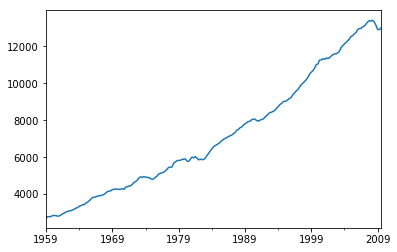

In [16]:
df['realgdp'].plot()

## Using the Hodrick-Prescott Filter for trend analysis

In [17]:
result = sm.tsa.filters.hpfilter(df['realgdp'])
result

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
 1960-06-30     23.040242
 1960-09-30     -1.355312
 1960-12-31    -67.462365
 1961-03-31    -81.367438
 1961-06-30    -60.167890
 1961-09-30    -46.369224
 1961-12-31    -20.695339
 1962-03-31     -2.162153
 1962-06-30     -4.718648
 1962-09-30    -13.556457
 1962-12-31    -44.369262
 1963-03-31    -43.320274
 1963-06-30    -44.546971
 1963-09-30    -26.298758
 1963-12-31    -44.261196
 1964-03-31    -14.434412
 1964-06-30    -20.266867
 1964-09-30    -19.137001
 1964-12-31    -54.824590
 1965-03-31    -15.962445
 1965-06-30    -13.740115
 1965-09-30     13.254828
 1965-12-31     56.030402
 1966-03-31    103.074337
 1966-06-30     72.175348
                  ...    
 2002-06-30    -95.260035
 2002-09-30   -114.798768
 2002-12-31   -190.025905
 2003-03-31   -221.225647
 2003-06-30   -207.139428
 2003-09-30    -89.685415
 2003-12-31    -61.895316
 2004-03-31 

In [18]:
type(result)

tuple

In [19]:
type(result[0])

pandas.core.series.Series

In [20]:
type(result[1])

pandas.core.series.Series

In [22]:
gdp_cycle, gdp_trend = result
df['trend'] = gdp_trend

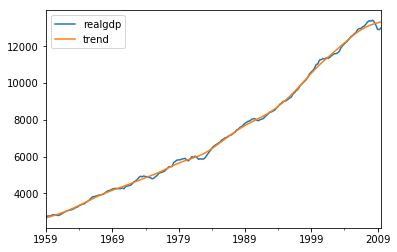

In [24]:
df[['realgdp', 'trend']].plot()

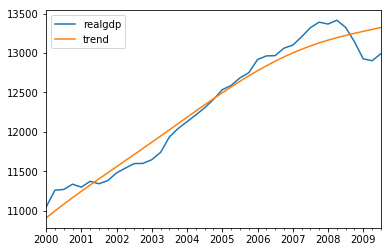

In [26]:
# zooming in
df[['realgdp', 'trend']]['2000-03-31':].plot()

# ETS Theory (Error-Trend-Seasonality)

* Exponential Smoothing
* Trend Methods Models
* ETS Decomposition

# EWMA Theory 
# (Exponentially Weighted Moving Averages)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [36]:
# this is a normal index
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [37]:
# Get rid of all the missing values in this dataset
airline.dropna(inplace=True)

In [38]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [39]:
# now its a DatetimeIndex
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [40]:
# Recap of making the SMA
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

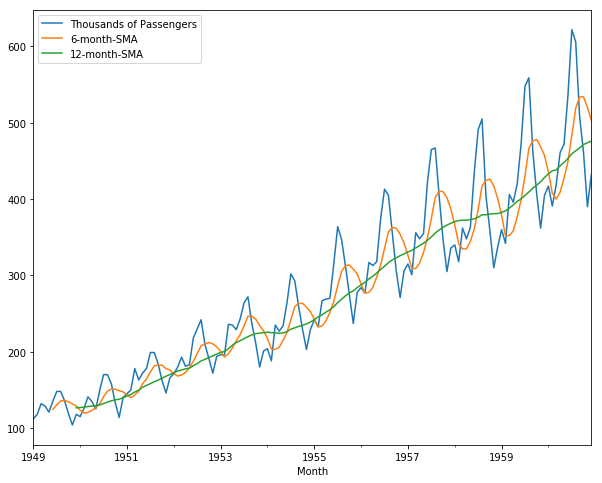

In [41]:
airline.plot(figsize=(10,8))

Weakness of SMA
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

### Creating EWMA

In [42]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

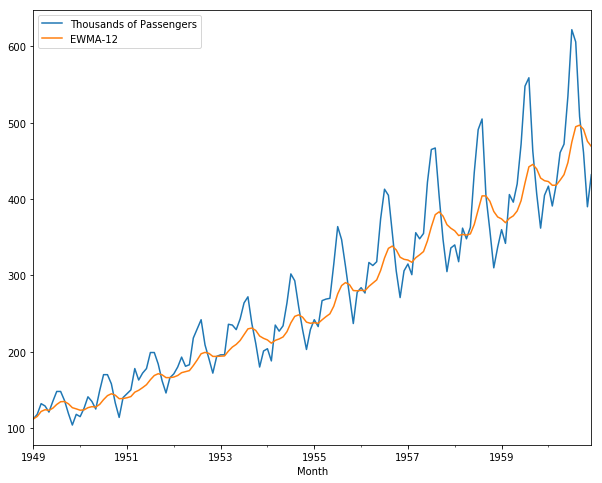

In [44]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8))

Full reading on mathematics of EWMA
* http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows